In [563]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [564]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("sulawesitengah.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  381 non-null    datetime64[ns]
 1   Tn       380 non-null    float64       
 2   Tx       378 non-null    float64       
 3   Tavg     368 non-null    float64       
 4   RH_avg   368 non-null    float64       
 5   RR       374 non-null    float64       
 6   ss       380 non-null    float64       
 7   ff_x     380 non-null    float64       
 8   ddd_x    380 non-null    float64       
 9   ff_avg   380 non-null    float64       
 10  ddd_car  380 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 32.9+ KB


<ipython-input-564-6b7028c7aa65>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [565]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,22.0,33.8,0.0,27.9
1,2023-02-01,22.4,33.2,0.0,27.6
2,2023-03-01,21.4,36.2,0.1,28.4
3,2023-04-01,21.6,35.6,8888.0,29.8
4,2023-05-01,22.6,36.4,0.0,29.7
...,...,...,...,...,...
376,2023-12-16,25.2,34.8,0.0,29.3
377,2023-12-17,25.4,34.0,8888.0,28.7
378,2023-12-18,26.0,33.0,0.9,28.1
379,2023-12-19,24.0,32.8,8888.0,28.6


In [566]:
# cek duplikat
df1.duplicated('Tanggal', keep=False).sum()

53

In [567]:
# hapus duplikat
df1 = df1.drop_duplicates('Tanggal', keep='first').reset_index()
df1.duplicated().sum()

0

In [568]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [569]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,22.0,33.8,0.0,27.9
1,31,31,2023-01-02,22.0,29.8,0.1,26.1
2,59,60,2023-01-03,22.0,31.8,7.7,26.0
3,90,92,2023-01-04,22.8,31.6,0.0,26.2
4,120,123,2023-01-05,23.0,35.2,0.0,28.7
...,...,...,...,...,...,...,...
349,349,360,2023-12-16,25.2,34.8,0.0,30.7
350,350,377,2023-12-17,25.4,34.0,0.0,28.7
351,351,378,2023-12-18,26.0,33.0,0.9,28.1
352,352,379,2023-12-19,24.0,32.8,0.0,28.6


In [570]:
#cek null
df1.isnull().sum()

level_0     0
index       0
Tanggal     0
Tn          1
Tx          3
RR          7
Tavg       13
dtype: int64

In [571]:
# isi yang null
mrr = df1['RR'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       1
dtype: int64

In [572]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

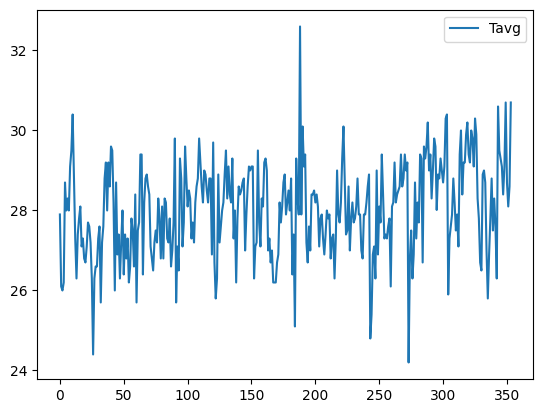

In [573]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

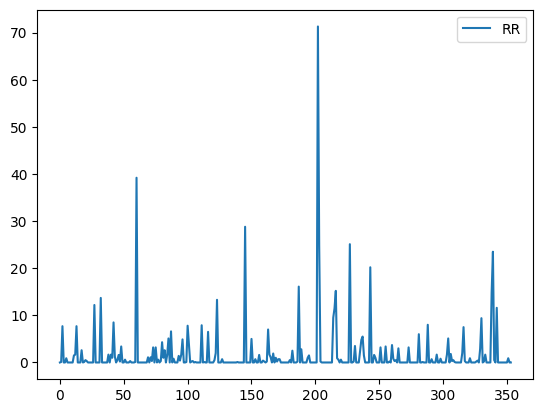

In [574]:
#plotting tavg
df1[['RR']].plot()

In [575]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,22.0,33.8,0.0,27.9,29.8,26.1,0.1
1,31,31,2023-01-02,22.0,29.8,0.1,26.1,31.8,26.0,7.7
2,59,60,2023-01-03,22.0,31.8,7.7,26.0,31.6,26.2,0.0
3,90,92,2023-01-04,22.8,31.6,0.0,26.2,35.2,28.7,0.0
4,120,123,2023-01-05,23.0,35.2,0.0,28.7,33.4,28.0,0.9
...,...,...,...,...,...,...,...,...,...,...
349,349,360,2023-12-16,25.2,34.8,0.0,30.7,34.0,28.7,0.0
350,350,377,2023-12-17,25.4,34.0,0.0,28.7,33.0,28.1,0.9
351,351,378,2023-12-18,26.0,33.0,0.9,28.1,32.8,28.6,0.0
352,352,379,2023-12-19,24.0,32.8,0.0,28.6,35.0,30.7,0.0


In [576]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,0.0,27.9,26.1,0.1
1,0.1,26.1,26.0,7.7
2,7.7,26.0,26.2,0.0
3,0.0,26.2,28.7,0.0
4,0.0,28.7,28.0,0.9
...,...,...,...,...
349,0.0,30.7,28.7,0.0
350,0.0,28.7,28.1,0.9
351,0.9,28.1,28.6,0.0
352,0.0,28.6,30.7,0.0


In [577]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,0.0,27.9,26.1,0.1
1,0.1,26.1,26.0,7.7
2,7.7,26.0,26.2,0.0
3,0.0,26.2,28.7,0.0
4,0.0,28.7,28.0,0.9
...,...,...,...,...
348,0.0,29.1,30.7,0.0
349,0.0,30.7,28.7,0.0
350,0.0,28.7,28.1,0.9
351,0.9,28.1,28.6,0.0


In [578]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [579]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,0.0,27.9,26.1,0.1,0
1,0.1,26.1,26.0,7.7,1
2,7.7,26.0,26.2,0.0,2
3,0.0,26.2,28.7,0.0,3
4,0.0,28.7,28.0,0.9,4
...,...,...,...,...,...
348,0.0,29.1,30.7,0.0,348
349,0.0,30.7,28.7,0.0,349
350,0.0,28.7,28.1,0.9,350
351,0.9,28.1,28.6,0.0,351


In [580]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [581]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [582]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [583]:
X_test

,Indeks,Tavg
282,282,29.4
283,283,29.3
284,284,26.7
285,285,29.6
286,286,29.3
...,...,...
348,348,29.1
349,349,30.7
350,350,28.7
351,351,28.1


In [584]:
#testing
pred1 = lr.predict(X_test)
pred1

array([28.48195564, 28.44991092, 27.59386089, 28.55062253, 28.45265738,
       28.5524535 , 28.75113026, 28.35652321, 28.48927954, 28.1276327 ,
       28.35926967, 28.62386685, 28.55886192, 28.03661574, 28.32997141,
       28.29792669, 28.46364323, 28.36567809, 28.26771294, 28.40046927,
       28.79690731, 28.83078301, 27.34848895, 27.81084741, 27.91064353,
       28.01043966, 28.30799705, 28.11115127, 27.88134527, 28.01410161,
       27.7513354 , 28.51033576, 28.70901252, 28.18256462, 28.4471618 ,
       28.44807729, 28.67971426, 28.77951039, 28.51674418, 28.45173924,
       28.71633643, 28.65133149, 28.42152549, 28.81796353, 28.68703817,
       28.16059026, 27.99670469, 27.63505785, 27.57005291, 28.36201349,
       28.39588919, 28.29792404, 27.73851592, 27.34390887, 27.70738668,
       28.00494408, 28.33546169, 27.90789442, 28.1724916 , 27.94268561,
       27.51511834, 28.93332294, 28.5716761 , 28.50667116, 28.44166623,
       28.21186023, 28.4434972 , 28.97177608, 28.31348733, 28.11

In [585]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

0.9459336572859509 1.3549154602355813


In [586]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
282,282,29.4
283,283,29.3
284,284,26.7
285,285,29.6
286,286,29.3
...,...,...
348,348,29.1
349,349,30.7
350,350,28.7
351,351,28.1


In [587]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
282,28.481956
283,28.449911
284,27.593861
285,28.550623
286,28.452657
...,...
348,28.443497
349,28.971776
350,28.313487


In [588]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

<ipython-input-588-a78c5f2a57f4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,27.9,NaN
1,26.1,NaN
2,26.0,NaN
3,26.2,NaN
4,28.7,NaN
...,...,...
348,29.1,28.443497
349,30.7,28.971776
350,28.7,28.313487
351,28.1,28.116642


<Axes: >

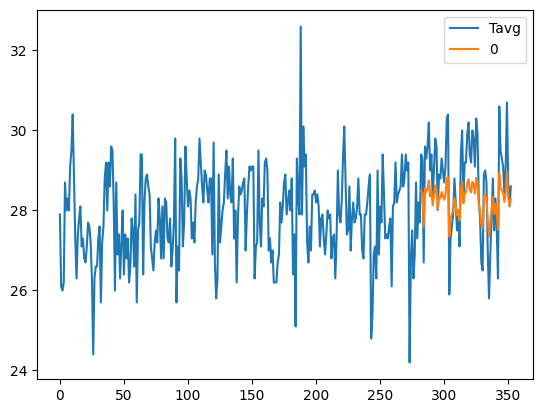

In [589]:
kan.plot()

In [590]:
new_data = [[354, 28.6],[355,28.6],[356,28.6],[357,28.6],[358,28.6],[359,28.6],[360,28.6]]
lr.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([28.28418907, 28.28510456, 28.28602005, 28.28693553, 28.28785102,
       28.28876651, 28.289682  ])

In [592]:
kan.to_json('Prediksi Sulawesi Tengah.json')